In [33]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("../data/processed/uganda_fake_news_v1_cleaned.csv")

df.head()





,id,text,label,source,platform_type,language,date_collected
0,UG_TRUE_001,The Ministry of Health confirms no outbreak of...,TRUE,Daily Monitor,News Website,English,2025-01-10
1,UG_FAKE_001,Drinking hot water every 15 minutes kills COVI...,FAKE,AfricaCheck,Fact-Check,English,2025-01-10
2,UG_FAKE_002,Government has approved free electricity for a...,FAKE,PesaCheck,Fact-Check,English,2025-01-11
3,UG_TRUE_002,Parliament passes new amendment to the Nationa...,TRUE,New Vision,News Website,English,2025-01-11
4,UG_TRUE_003,Museveni alisema hakuna lockdown tena nchini U...,TRUE,BBC Africa,News Website,Mixed,2025-01-12


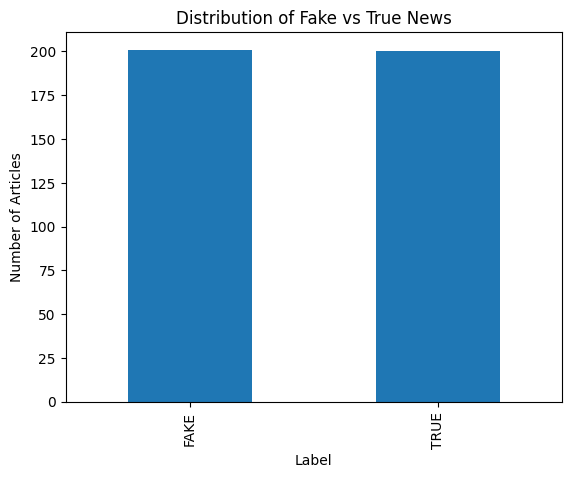

In [34]:
# Visualize the distribution of fake vs true news articles
label_counts = df['label'].value_counts()

label_counts.plot(kind='bar')
plt.title("Distribution of Fake vs True News")
plt.xlabel("Label")
plt.ylabel("Number of Articles")
plt.show()

In [35]:
# Add a new column for text length
df['text_length'] = df['text'].str.split().str.len()
# Display descriptive statistics of text lengths by label
df.groupby('label')['text_length'].describe()

,count,mean,std,min,25%,50%,75%,max
label,,,,,,,,
FAKE,201.0,20.179104,8.163196,5.0,13.0,20.0,26.0,39.0
TRUE,200.0,10.710000,1.932504,6.0,9.0,11.0,12.0,17.0


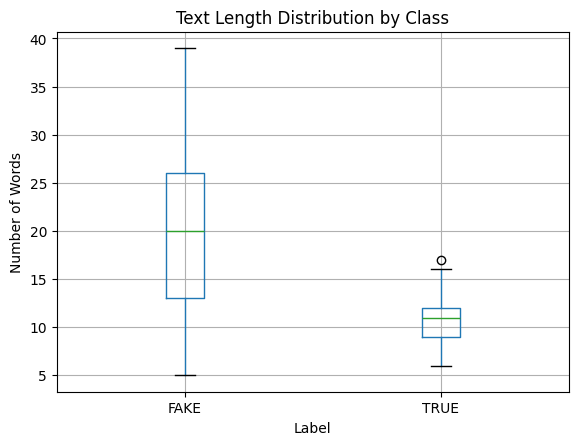

In [36]:
# Visualize the distribution of text lengths by label
df.boxplot(column='text_length', by='label')
plt.title("Text Length Distribution by Class")
plt.suptitle("")
plt.xlabel("Label")
plt.ylabel("Number of Words")
plt.show()

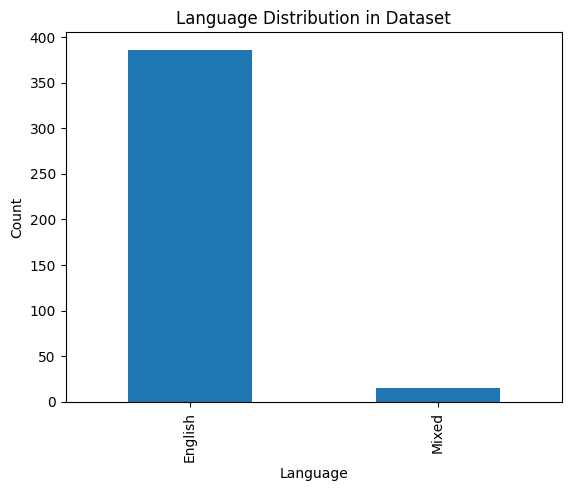

In [37]:
# Visualize the distribution of languages in the dataset
df['language'].value_counts().plot(kind='bar')
plt.title("Language Distribution in Dataset")
plt.xlabel("Language")
plt.ylabel("Count")
plt.show()

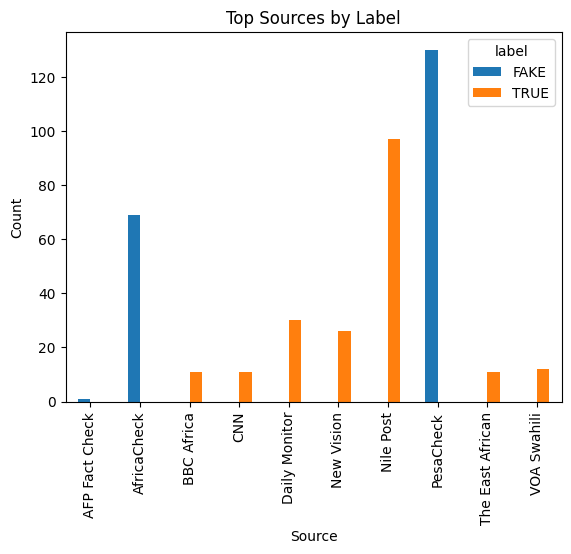

In [38]:
# Cross-tabulation of source and label
pd.crosstab(df['source'], df['label']).head(10)

# Visualize the top sources by label
top_sources = df['source'].value_counts().head(10).index
pd.crosstab(df[df['source'].isin(top_sources)]['source'], df['label']).plot(kind='bar')
plt.title("Top Sources by Label")
plt.xlabel("Source")
plt.ylabel("Count")
plt.show()


In [39]:
# Generate word clouds for fake and true news articles
fake_text = " ".join(df[df['label'] == 'FAKE']['text'])
true_text = " ".join(df[df['label'] == 'TRUE']['text'])

# Word frequency analysis for fake news
from collections import Counter

Counter(fake_text.lower().split()).most_common(10)





[('the', 199),
 ('is', 124),
 ('of', 106),
 ('this', 89),
 ('not', 88),
 ('video', 82),
 ('in', 78),
 ('ugandan', 64),
 ('to', 55),
 ('president', 52)]

In [40]:
# Word frequency analysis for true news
Counter(true_text.lower().split()).most_common(10)

[('to', 183),
 ("uganda's", 85),
 ('new', 59),
 ('in', 55),
 ('government', 49),
 ('and', 27),
 ('of', 26),
 ('climate', 25),
 ('sector', 24),
 ('support', 20)]

In [41]:

# Descriptive statistics for key columns
df[['label','text_length','language','source']].describe(include='all')


,label,text_length,language,source
count,401,402.000000,401,401
unique,2,NaN,2,13
top,FAKE,NaN,English,PesaCheck
freq,201,NaN,386,130
mean,NaN,15.475124,NaN,NaN
std,NaN,7.592530,NaN,NaN
min,NaN,5.000000,NaN,NaN
25%,NaN,10.000000,NaN,NaN
50%,NaN,12.000000,NaN,NaN
75%,NaN,20.000000,NaN,NaN
